# R ggtree phylogeny of ON WTD SARS-CoV-2

This R Jupyter Notebook was used to generate the phylogenetic tree visualizations for ON WTD SARS-CoV-2 and related SARS-CoV-2 sequences from GISAID using ggtree.

In [1]:
# ggtree v3.2.0
library(ggtree)
# ggnewscale for multiple independent scales in the same plot
library(ggnewscale)
# tidyverse 1.3.1
# ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
# ✔ tibble  3.1.6     ✔ dplyr   1.0.7
# ✔ tidyr   1.1.4     ✔ stringr 1.4.0
# ✔ readr   2.1.1     ✔ forcats 0.5.1
library(tidyverse)

ggtree v3.2.0  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628



── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [2]:
df = read_tsv('metadata-subsampled.tsv')

Rows: 1308 Columns: 12

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (12): sample, type, accession, collection_date, host, clade, lineage, re...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
tree = read.tree('tree-subsampled.newick')

In [4]:
tree


Phylogenetic tree with 1309 tips and 1307 internal nodes.

Tip labels:
  MN908947.3, USA/MT-BHDH-155/2021, USA/KS-KHEL-0228/2020, USA/CO-CDPHE-2009183838/2020, USA/KS-QDX-4448/2020, USA/LA-EVTL1824/2021, ...

Rooted; includes branch lengths.

In [5]:
heatmapData = as.data.frame(sapply(df, as.character))

In [6]:
rn = df[['sample']]

In [7]:
nrow(heatmapData)

[1] 1308

In [8]:
length(rn)

[1] 1308

In [9]:
rownames(heatmapData) = rn

In [10]:
colnames(heatmapData)

[1] "sample"          "type"            "accession"       "collection_date"
 [5] "host"            "clade"           "lineage"         "region"         
 [9] "country"         "division"        "city"            "VOC"

Subset of dataframe with only the fields to be displayed in 

In [11]:
hmd = heatmapData[c('host')]

In [12]:
hmd[['clade']] = heatmapData$clade

In [13]:
hmd[['animal_host']] = df$host
hmd[['animal_host']][(hmd[['animal_host']] %in% c('Environment'))] = NA
hmd[['animal_host']][hmd[['animal_host']] == 'Environment'] = NA
hmd[['animal_host']] = stringr::str_replace(hmd[['animal_host']], pattern = '(\\w+).*', replacement = '\\1')

In [14]:
sort(table(hmd$animal_host))


   Arctictis      Crocuta Hippopotamus        Nasua         Puma Prionailurus 
           1            1            1            1            1            2 
     Mustela  Chlorocebus          Mus        Aonyx Mesocricetus      Gorilla 
           3            4            4            8           14           15 
       Canis        Felis   Odocoileus     Panthera     Neovison        Human 
          54           93           93          118          212          672 

In [15]:
low_abundance_host = names(sort(table(hmd$animal_host))[1:9])

In [16]:
sort(table(hmd$animal_host))[low_abundance_host]


   Arctictis      Crocuta Hippopotamus        Nasua         Puma Prionailurus 
           1            1            1            1            1            2 
     Mustela  Chlorocebus          Mus 
           3            4            4 

In [17]:
hmd[['animal_host']][hmd[['animal_host']] %in% low_abundance_host] = 'Other'

In [18]:
table(hmd$animal_host)


       Aonyx        Canis        Felis      Gorilla        Human Mesocricetus 
           8           54           93           15          672           14 
    Neovison   Odocoileus        Other     Panthera 
         212           93           18          118 

In [19]:
rev(sort(table(hmd$animal_host)))


       Human     Neovison     Panthera   Odocoileus        Felis        Canis 
         672          212          118           93           93           54 
       Other      Gorilla Mesocricetus        Aonyx 
          18           15           14            8 

In [20]:
heatmapData$collection_date = as.character.Date(df$collection_date)

In [21]:
heatmapData[['date']] = parse_date(heatmapData$collection_date)

Warning message:
“54 parsing failures.
row col   expected  actual
  9  -- date like  2020-12
 23  -- date like  2021-02
 29  -- date like  2021-02
 41  -- date like  2021-01
 51  -- date like  2020-06
... ... .......... .......
See problems(...) for more details.
”


In [22]:
mask_in_tree = df$sample %in% tree$tip.label

In [23]:
in_tree_accessions = df[mask_in_tree,]$accession

In [24]:
write_lines(x = in_tree_accessions[!is.na(in_tree_accessions)], file = 'subsampled-tree-accessions.txt', sep = '\n')

In [25]:
length(unique(df$clade))

[1] 12

In [26]:
table(df$clade)


  G  GH  GK  GR GRA GRY  GV   L   O   S   V 
302 577 214  97  32  16  29   6  21   3   4 

In [27]:
table(df$VOC)


  Alpha B.1.311    Beta   Delta Epsilon     Eta   Gamma    Iota   Iota*  Lambda 
     27      50      20     213      17      10      21      11       2       8 
     Mu Omicron 
     20      32 

In [28]:
df[['VOC']][df[['VOC']] == ''] = NA

In [29]:
on_wtd_names = c('4645','4581','4658','Canada/ON-PHL-21-44225/2021', '4534', '4662', '4538', '4649')

In [30]:
tree2 = groupClade(tree, MRCA(tree, on_wtd_names))

In [31]:
node_mrca_on_wtd = MRCA(tree, on_wtd_names)
node_subtree = tidytree::parent(tree, node_mrca_on_wtd) %>%
                tidytree::parent(tree, .) %>% 
                tidytree::parent(tree, .) %>%
                tidytree::parent(tree, .) %>%
                tidytree::parent(tree, .)

tree2 = groupClade(tree, c(node_subtree, node_mrca_on_wtd))

In [32]:
tree2_tbl = as.tibble(tree2)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [33]:
subset_tree_samples = tree2_tbl[tree2_tbl$group %in% c(1,2),]$label
subset_tree_samples = subset_tree_samples[!is.na(subset_tree_samples)]

In [34]:
df_subtree = df[df$sample %in% subset_tree_samples,]

In [35]:
for(voc in unique(df$VOC)) {
    if (is.na(voc)){
        next
    }
    mask = df$VOC == voc & !is.na(df$VOC)
    samples = df$sample[mask]
    print(c(voc, length(samples)))
}

[1] "B.1.311" "50"     
[1] "Mu" "20"
[1] "Iota" "11"  
[1] "Epsilon" "17"     
[1] "Iota*" "2"    
[1] "Beta" "20"  
[1] "Gamma" "21"   
[1] "Lambda" "8"     
[1] "Alpha" "27"   
[1] "Omicron" "32"     
[1] "Delta" "213"  
[1] "Eta" "10" 


In [36]:
df[['animal_host_genus']] = hmd$animal_host

In [37]:
host_genus = hmd$animal_host

Replace "Human" with "Homo"

In [38]:
df$animal_host_genus[df$animal_host_genus == 'Human'] = 'Homo'

In [39]:
options(repr.plot.width  = 10,
        repr.plot.height = 8)

In [79]:
# changed to rect layout from circular for easier comparison between lineages
p = ggtree(tree2, aes(color=group), layout='rectangular') %<+% df
# highlight taxa highlighted in tree of ON WTD + most closely related sequences
p = p + geom_hilight(mapping=aes(subset = node %in% c(node_subtree)), fill=NA, color='#888888', linetype='dotted',
                        type = "gradient", graident.direction = 'rt', alpha=0.3)

dark_gray = '#555555'
# this was originally used to set the colour of branches to highlight certain clades
p = p + scale_color_manual(values=c(dark_gray, dark_gray, dark_gray), guide='none')

p = p + new_scale_color()
p = p + new_scale_fill()

p = p + geom_tippoint(aes(color=animal_host_genus), size=1, show.legend=TRUE)

p = p + geom_tippoint(aes(subset=node %in% c(1)), shape=23, stroke=1, size=1.5, fill='#000000', color='darkred')
p = p + geom_tiplab(aes(subset=node %in% c(1)), size=3, vjust=1.25)

host_genus_names = c(
'Aonyx',
'Canis',
'Felis',
'Gorilla',
'Homo',
'Mesocricetus',
'Neovison',
'Odocoileus',
'Panthera',
'Other'
)

host_colors = c(
'#984ea3', # purple
'#f781bf', # pink
'#e41a1c', # red
'#377eb8', # blue
'#e6ab02', # yellow
'#a65628', # brown
'#4daf4a', # green
'#d95f02', # orange
'#000000',
'#999999' # gray
)

p = p + geom_tippoint(aes(color=animal_host_genus), size=1, show.legend=TRUE)

p = p + scale_color_manual(breaks=host_genus_names, values=host_colors, na.translate=F, 
                           guide=guide_legend(title='Host Genus', 
                                              label.theme=element_text(size=10, face='italic'),
                                              order=0,
                                              override.aes = list(alpha=1, size=5, linesize=5)))
# p = p + theme(legend.key.size=unit(2, 'cm'))
p = p + new_scale_color()

# list of attrs for geom_cladelab: [key] label; [1] offset.text; [2] hjust; [3] vjust
label_offsets = list(Omicron=c(0.0004, 0, 0.5),
                     Beta=c(0.00005, 0, 0.5),
                     Delta=c(0.00015, 0, 0.5),
                     Gamma=c(0.0004, 0, 0.5),
                     Epsilon=c(0.00005, 0, 0.5),
                     Eta=c(0.00015, 0, 0.55),
                     Iota=c(0.000025, 0, 0.3),
                     "Iota*"=c(0.00001, 0.05, 0.95),
                     Mu=c(0.00005, 0, 0.5),
                     Lambda=c(0.000425, 0.05, 0.75),
                     Alpha=c(0.0003, 0, 0.45))
# adjust the clade label position of each VOC/VOI
for(voc in unique(df$VOC)) {
    if (is.na(voc)){
        next
    }
    mask = df$VOC == voc & !is.na(df$VOC)
    samples = df$sample[mask]
    print(c(voc, length(samples)))
    node_voc = MRCA(tree2, samples)
    voc_adj = label_offsets[[voc]]
    offset_text = 0.00005
    vjust = 0.5
    hjust = 0
    if (!is.null(voc_adj)) {
        offset_text = voc_adj[1]
        hjust = voc_adj[2]
        vjust = voc_adj[3]
    }
    p = p + geom_cladelab(node=node_voc, label=voc, 
                          offset=0.000025, 
                          offset.text=0.000015,
                          extend=6,
                          vjust=vjust,
                          hjust=hjust
                         )
}
# label ON WTD and human taxa in tree
p = p + geom_cladelabel(node=node_mrca_on_wtd, label='B.1.641', extend=7, offset=-0.00003)
# manually position tree scale and rotate tree viz
p = p + geom_treescale(y = 1, offset=8, width=0.0002, fontsize=3, color = dark_gray)

p = p + scale_y_continuous(expand = c(0.02,0))
p = p + scale_x_continuous(expand = c(0.0,0.0005))
# adjust margins and legend position
p = p + theme(legend.position = c(0.9, 0.2), 
              plot.margin = margin(0.1, -0.5, 0.1, -3, unit = 'cm'))

# save to PDF 
ggsave(p, filename = 'global-tree-rect.pdf', height = 8, width =10)

Warning message:
“Ignoring unknown parameters: graident.direction”


[1] "B.1.311" "50"     
[1] "Mu" "20"
[1] "Iota" "11"  
[1] "Epsilon" "17"     
[1] "Iota*" "2"    
[1] "Beta" "20"  
[1] "Gamma" "21"   
[1] "Lambda" "8"     
[1] "Alpha" "27"   
[1] "Omicron" "32"     
[1] "Delta" "213"  
[1] "Eta" "10" 


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 12 rows containing missing values (geom_point_g_gtree).”
Warning message:
“Removed 12 rows containing missing values (geom_point_g_gtree).”


In [96]:
options(repr.plot.width  = 10,
        repr.plot.height = 8)

Warning message:
“Removed 12 rows containing missing values (geom_point_g_gtree).”
Warning message:
“Removed 12 rows containing missing values (geom_point_g_gtree).”


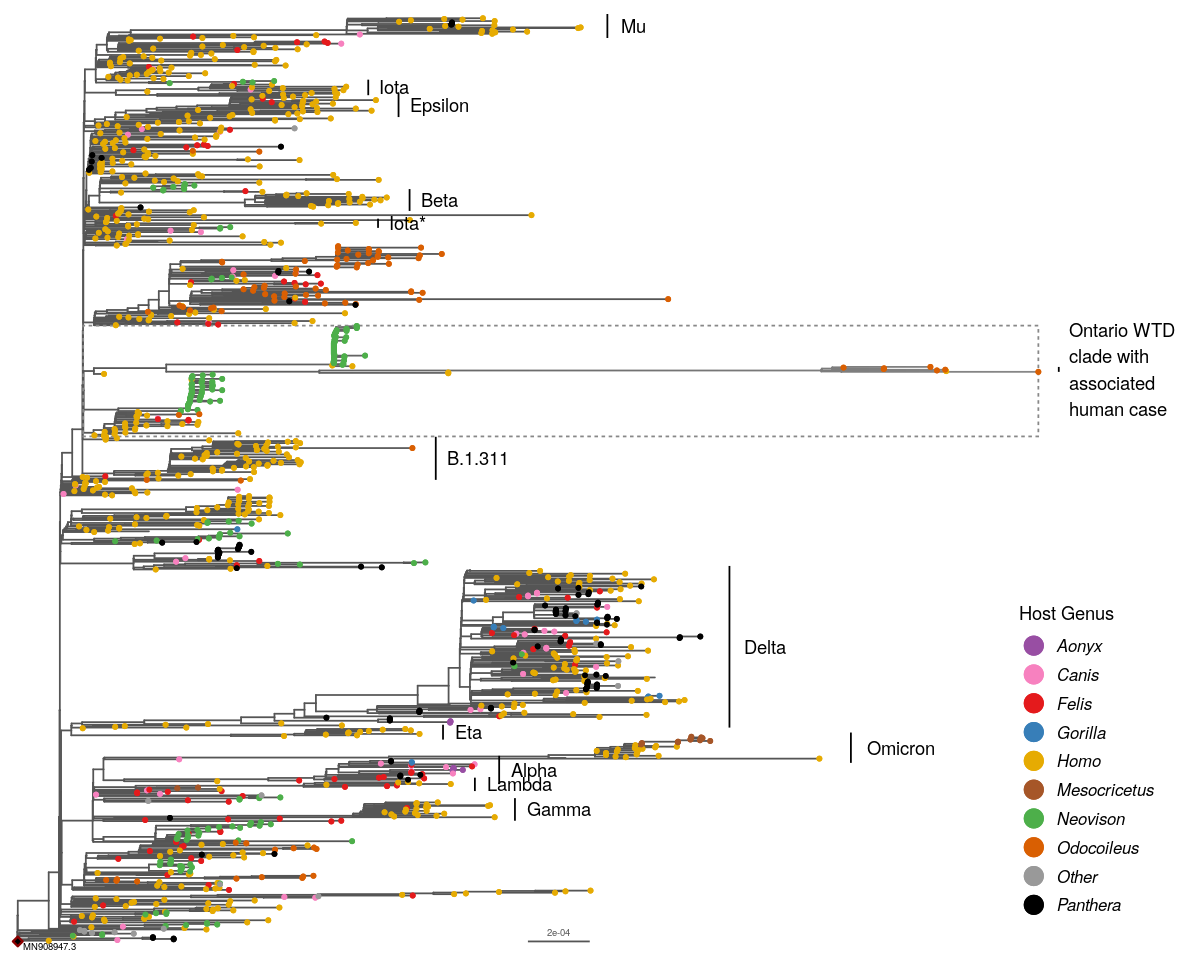

In [97]:
p

In [41]:
length(subset_tree_samples)

[1] 157

In [42]:
write_lines(x = subset_tree_samples, file = 'subtree-samples.txt', sep='\n')

In [43]:
hmd_sub = heatmapData[subset_tree_samples, ]

In [44]:
df_sub = df[df$sample %in% subset_tree_samples, ]

In [45]:
subtree = read.tree('subtree-collapsed.newick')

In [46]:
subtree


Phylogenetic tree with 37 tips and 36 internal nodes.

Tip labels:
  4534, 4649, 4581, 4538, 4645, 4662, ...
Node labels:
  , 72.00, 93.00, 100.00, 100.00, 100.00, ...

Rooted; includes branch lengths.

In [47]:
subtree2 = groupClade(subtree, MRCA(subtree, on_wtd_names))

In [48]:
hmd_sub = as.data.frame(sapply(df, as.character))

In [49]:
hmd_sub[['division']] = hmd_sub$division

In [50]:
dfaa = read_tsv('on-wtd-deer-aa-matrix-collapsed-nr-samples.tsv')

Rows: 37 Columns: 69

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (69): sample, ORF1a:T265I, ORF1a:T708I, ORF1a:A1204V, ORF1a:A1283V, ORF1...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [51]:
rownames(dfaa) = dfaa$sample

Warning message:
“Setting row names on a tibble is deprecated.”


In [52]:
rownames(dfaa)

[1] "4538"                                 
 [2] "4645"                                 
 [3] "4649"                                 
 [4] "4534"                                 
 [5] "4581"                                 
 [6] "4662"                                 
 [7] "4658"                                 
 [8] "Canada/ON-PHL-21-44225/2021"          
 [9] "USA/MI-MDHHS-SC23517/2020"            
[10] "USA/MI-MDHHS-SC22669/2020"            
[11] "mink/USA/MI-CDC-3886954-001/2020"     
[12] "mink/USA/MI-CDC-3886572-001/2020"     
[13] "mink/USA/MI-CDC-3886516-001/2020"     
[14] "mink/USA/MI-CDC-3886779-001/2020"     
[15] "mink/USA/MI-CDC-3886891-001/2020"     
[16] "USA/MI-MDHHS-SC22140/2020"            
[17] "USA/MI-MDHHS-SC22125/2020"            
[18] "USA/NJ-NYGC-NJ-BioR-303-AmpliSeq/2020"
[19] "mink/USA/WI-CDC-3892612-001/2020"     
[20] "mink/USA/WI-CDC-3892613-001/2020"     
[21] "mink/USA/WI-CDC-3892918-001/2020"     
[22] "mink/USA/WI-CDC-3892848-001/2020"     
[23] "mink/USA/WI-CDC-3892621-001/2020"     
[24] "mink/USA/WI-CDC-3892618-001/2020"     
[25] "mink/USA/WI-20-031493-001/2020"       
[26] "USA/NE-CUMC_21081058/2021"            
[27] "USA/TX-HMH-MCoV-8963/2020"            
[28] "USA/TX-HMH-MCoV-8462/2020"            
[29] "USA/TX-HMH-MCoV-40474/2020"           
[30] "USA/TX-HMH-MCoV-33283/2020"           
[31] "USA/TX-HMH-MCoV-40932/2020"           
[32] "USA/TX-HMH-MCoV-39934/2020"           
[33] "USA/TX-HMH-4685/2020"                 
[34] "USA/CO-CDPHE-2010132029/2020"         
[35] "USA/CA-CZB-13805/2020"                
[36] "USA/TX-HMH-MCoV-34510/2020"           
[37] "USA/TX-HMH-MCoV-16519/2020"

In [53]:
dfaa_heatmap = as.data.frame(dfaa[,colnames(dfaa)[2:ncol(dfaa)]])

In [54]:
rownames(dfaa_heatmap) = dfaa$sample

In [55]:
rownames(hmd_sub) = hmd_sub$sample

In [56]:
hmd_sub = hmd_sub[dfaa$sample,]

In [57]:
subtree2_tbl = as.tibble(subtree2)

Read table with AA pattern counts for collapsed node representatives

Table looks like this:

| sample | count |
| --- | --- |
| Sample1 | 10 |
| Sample2 | 5 |

In [58]:
df_collapsed = read.table('aa-mut-pattern-collapsed-count.tsv', row.names = 1, col.names = c('count'))

Warning message in read.table("aa-mut-pattern-collapsed-count.tsv", row.names = 1, :
“header and 'col.names' are of different lengths”


Set `NA` where `count == 0`

In [59]:
df_collapsed$count[df_collapsed$count == 0] = NA

Add collapsed count to tibble tree

In [60]:
subtree2_tbl[['collapsed']] = df_collapsed[subtree2_tbl$label,] 

Replace collapsed count where count > 0 (not NA) with label, e.g. `10 collapsed`

In [61]:
subtree2_tbl$collapsed[!is.na(subtree2_tbl$collapsed)] = paste(subtree2_tbl$collapsed[!is.na(subtree2_tbl$collapsed)], 'collapsed')

Convert tibble back to tree for viz

In [62]:
subtree2 = treeio::as.treedata(subtree2_tbl)

Get State/Province and Host metadata for viz beside tree in ggtree heatmap

In [63]:
hmd_sub[['State/Province']] = hmd_sub$division
hmd_sub[['Host']] = hmd_sub$host

Replace `Human` with `Homo sapiens` so that all host species are in Latin

In [64]:
hmd_sub$Host[hmd_sub$Host == 'Human'] = 'Homo sapiens'

# Subtree with AA mutation annotation

- colours are set manually with `scale_fill_manual`
- gene labels are ordered using `breaks` arg for `scale_fill_manual`
- margins are adjusted with `theme`

In [67]:
p = ggtree(subtree2, aes(color=group)) %<+% df_sub 
# probably don't need this, but kept since ON WTD clade is set as a "group" in the tree as treedata
p = p + scale_color_manual(values=c(dark_gray, dark_gray), guide='none')
p = p + new_scale_color()
# highlight nodes with >=95% UFBoot
p = p + geom_nodepoint(aes(label=as.numeric(label), subset=(!is.na(as.numeric(label)) & as.numeric(label) >= 95)),
                      size=1, color='darkgreen')
p = p + geom_text2(aes(label=as.numeric(label), 
                       subset=(!is.na(as.numeric(label)) & as.numeric(label) >= 95 & !(label %in% on_wtd_names) )),
                      size=2, nudge_x=0.00011, nudge_y=-0.2)
p = p + new_scale_color()
# Highlight host species in tip label colours and dotted lines
p = p + geom_tiplab(aes(color=host), align=T, size=2.7, linetype='dotted', show.legend=F, linesize = 0.1)
p = p + scale_color_manual(values = c(
#     '#f781bf', # pink
#     '#e41a1c', # red
    '#e6ab02', #yellow
    '#4daf4a', # green
    '#d95f02' # orange
), na.translate=F, guide='none')
p = p + new_scale_color()
p = p + geom_tiplab(aes(label=collapsed), offset=0.0001, size=2.5, show.legend=F, color=dark_gray, geom='label')

# offset and offset step needs to be set manually and adjusted based on plot size to ensure proper placement of
# plot elements beside tree
offset = 0.0032
offset_step = 0.0002

hm_col_fontsize = 2.7
# Highlight host species as rects beside tree
p = gheatmap(p, hmd_sub['Host'], font.size=hm_col_fontsize, colnames=T,
             colnames_offset_y=-0.25, hjust=0, colnames_angle=45, colnames_position="top",
             width=0.05, 
             offset=offset,
             color=NULL)
p = p + scale_fill_manual(values = c(
#     '#f781bf', # pink
#     '#e41a1c', # red
    '#e6ab02', #yellow
    '#4daf4a', # green
    '#d95f02' # orange
), na.translate=F, guide=guide_legend(title='Host', label.theme=element_text(face='italic', size=10)))

p = p + new_scale_fill()

offset = offset + offset_step

p = gheatmap(p, hmd_sub['State/Province'], font.size=hm_col_fontsize,
             colnames_offset_y=-0.25, hjust=0, colnames_angle=45, colnames_position="top",
             width=0.05, 
             offset=offset, 
             colnames=T, 
             color=NULL)

p = p + scale_fill_brewer(palette = 'Set3', na.translate=F, guide=guide_legend(title='State/Province'))

p = p + new_scale_fill()

offset = offset + offset_step + 0.00005
# add gheatmap of AA mutation data
p = gheatmap(p, dfaa_heatmap, font.size=hm_col_fontsize,
             colnames_offset_y=-0.25, hjust=0, colnames_angle=45, colnames_position="top",
             width=4, 
             offset=offset, 
             colnames=T,
             color='#eeeeee')

# expand y-axis by a little bit so that AA mutation matrix y-axis labels don't get cut off
p = p + scale_y_continuous(expand = c(0.08,0))
# manually set gene colours and order of genes for the legend; default is alphabetical
p = p + scale_fill_manual(breaks=c(
'ORF1a',
'ORF1b',
'S',
'ORF3a',
'E',
'ORF8',
'N',
'*No Coverage',
'-'
), 
values=c(
'#1b9e77',
'#d95f02',
'#7570b3',
'#e7298a',
'#66a61e',
'#e6ab02',
'#a6761d',
'gray',
'white'
), na.translate=F, guide=guide_legend(title='Gene'))


p = p + theme(plot.margin=margin(0, 0.1, -1.8, -1.7, "cm"), legend.margin=margin(0,0,-0,-1.75,'cm'),
              plot.background=element_rect(fill = "transparent", color='transparent'),
              panel.background=element_rect(fill='transparent', color='transparent'))
# saving to PDF and viewing with evince for high res, hot-reloading viz of figure
ggsave(plot = p, filename = 'subtree-collapsed-UFBoot.pdf', height = 10, width = 16)

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the exist

# Subtree with uncollapsed nodes

Taxa not collapsed down to unique AA profiles

In [66]:
p = ggtree(subtree2, aes(color=group)) %<+% df_sub 

p = p + scale_color_manual(values=c(dark_gray, dark_gray), guide='none')
p = p + new_scale_color()
p = p + geom_nodepoint(aes(label=as.numeric(label), subset=(!is.na(as.numeric(label)) & as.numeric(label) > 95)),
                      size=1, color='green')

p = p + geom_tiplab(align=T, size=1.5, linetype='dotted', show.legend=F, color=dark_gray, linesize = 0.1)

offset = 0.0015
offset_step = 0.0002

p = gheatmap(p, hmd_sub['host'], font.size = 2,
             colnames_offset_y=0, hjust=0, colnames_angle=45, colnames_position="top",
             width=0.05, 
             offset=offset,
             colnames=T,
             color=NULL)
p = p + scale_fill_manual(values = c(
    '#f781bf', # pink
    '#e41a1c', # red
    '#e6ab02', #yellow
    '#4daf4a', # green
    '#d95f02' # orange
), na.translate=F, guide=guide_legend(title='Host'))

p = p + new_scale_fill()

offset = offset + offset_step

p = gheatmap(p, hmd_sub['division'], font.size = 2,
             colnames_offset_y=0, hjust=0, colnames_angle=45, colnames_position="top",
             width=0.05, 
             offset=offset, 
             colnames=T, 
             color=NULL)

p = p + scale_fill_brewer(palette = 'Set3', na.translate=F, guide=guide_legend(title='State/Province'))

p = p + new_scale_fill()

offset = offset + offset_step + 0.00005

p = gheatmap(p, dfaa_heatmap, font.size = 2, 
             colnames_offset_y=0, hjust=0, colnames_angle=45, colnames_position="top",
             width=4, 
             offset=offset, 
             colnames=T,
             color='#eeeeee')

p = p + scale_y_continuous(expand = c(0.075,0))
p = p + scale_fill_manual(values=c(
'white',
'gray',
'#1b9e77',
'#d95f02',
'#7570b3',
'#e7298a',
'#66a61e',
'#e6ab02',
'#a6761d',
'#666666'
), na.translate=F, guide=guide_legend(title='Gene'))


p = p + theme(plot.margin=margin(0, 0, -1.5, -1.75, "cm"), legend.margin=margin(0,0,0,-1.75,'cm'),
              plot.background=element_rect(fill = "transparent", color='transparent'),
              panel.background=element_rect(fill='transparent', color='transparent'))

ggsave(plot = p, filename = 'subtree-uncollapsed-UFBoot.pdf', height = 10, width = 16)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
